In [ ]:
pip install geopandas

In [ ]:
pip install sentinelhub

In [ ]:
import geopandas

In [ ]:
pip install folium

In [ ]:
pip install sentinelsat

In [ ]:
pip install rasterio

In [ ]:
import folium

In [ ]:
import geopandas as gpd

In [ ]:
from sentinelsat.sentinel import SentinelAPI

In [ ]:
pip install matplotlib

In [ ]:
import rasterio 
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask

In [ ]:
pip install osgeo 

In [ ]:
from osgeo import gdal

In [1]:
import folium

In [2]:
import folium
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI
import rasterio 
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask

In [ ]:
from osgeo import gdal

In [ ]:
#create geojson with borders first
#http://geojson.io/#map=14/55.6576/37.3846

In [ ]:
m = folium.Map([55.65,37.38], zoom_start=11)
boundary = gpd.read_file(r'map.geojson')
folium.GeoJson(boundary).add_to(m)
m

In [99]:
footprint = None
for i in boundary['geometry']:
    footprint = i
    
user = 'dseledkov' 
password = '7ange12345'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
products = api.query(footprint,
                     date = ('20210301', '20210322'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [100]:
gdf = api.to_geodataframe(products)
gdf_sorted = gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,generationdate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,datastripidentifier,granuleidentifier,uuid,geometry
ddb9a46a-fc1d-4271-a2c4-5c9fec21ad44,S2A_MSIL2A_20210320T084641_N0214_R107_T37UCB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-03-20T08:46:41.024Z, Instrument: MS...",false,2021-03-20 08:46:41.024,2021-03-20 08:46:41.024,2021-03-20 15:49:12.765,2021-03-20 10:54:52,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20210320T084641_N0214_R107_T37UCB_2...,S2A_OPER_MSI_L2A_DS_VGS4_20210320T105452_S2021...,S2A_OPER_MSI_L2A_TL_VGS4_20210320T105452_A0299...,ddb9a46a-fc1d-4271-a2c4-5c9fec21ad44,"MULTIPOLYGON (((35.87922 54.91903, 37.59160 54..."


In [101]:
api.download('ddb9a46a-fc1d-4271-a2c4-5c9fec21ad44')

Downloading: 100%|██████████| 1.24G/1.24G [25:15<00:00, 818kB/s]  
MD5 checksumming: 100%|██████████| 1.24G/1.24G [00:08<00:00, 144MB/s]


{'id': 'ddb9a46a-fc1d-4271-a2c4-5c9fec21ad44',
 'title': 'S2A_MSIL2A_20210320T084641_N0214_R107_T37UCB_20210320T105452',
 'size': 1239643759,
 'md5': '688fa71f7d569725c54664c96ad4addc',
 'date': datetime.datetime(2021, 3, 20, 8, 46, 41, 24000),
 'footprint': 'POLYGON((35.80051143878046 55.90416762514414,37.55602214889276 55.93727334575647,37.59160129793925 54.95094226179851,35.87922011704246 54.91902653885059,35.80051143878046 55.90416762514414))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ddb9a46a-fc1d-4271-a2c4-5c9fec21ad44')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 3, 20, 15, 50, 11, 141000),
 'Ingestion Date': datetime.datetime(2021, 3, 20, 15, 49, 12, 765000),
 'path': './S2A_MSIL2A_20210320T084641_N0214_R107_T37UCB_20210320T105452.zip',
 'downloaded_bytes': 1239643759}

In [19]:
from os import listdir

In [95]:
bands = r'./S2A_MSIL2A_20210320T171011_N0214_R112_T14QLJ_20210320T213921.SAFE/GRANULE/L2A_T14QLJ_A029996_20210320T171844/IMG_DATA/R10m/'

In [102]:
bands = r'./S2A_MSIL2A_20210320T084641_N0214_R107_T37UCB_20210320T105452.SAFE/GRANULE/L2A_T37UCB_A029991_20210320T085319/IMG_DATA/R10m'

In [104]:
listdir(bands)

['T37UCB_20210320T084641_AOT_10m.jp2',
 'T37UCB_20210320T084641_B08_10m.jp2',
 'T37UCB_20210320T084641_B04_10m.jp2',
 'T37UCB_20210320T084641_B02_10m.jp2',
 'T37UCB_20210320T084641_TCI_10m.jp2',
 'T37UCB_20210320T084641_WVP_10m.jp2',
 'T37UCB_20210320T084641_B03_10m.jp2']

In [105]:
#SOL
blue = rasterio.open(bands+'/T37UCB_20210320T084641_B02_10m.jp2')
green = rasterio.open(bands+'/T37UCB_20210320T084641_B03_10m.jp2') 
red = rasterio.open(bands+'/T37UCB_20210320T084641_B04_10m.jp2') 
nir = rasterio.open(bands+'/T37UCB_20210320T084641_B08_10m.jp2')

In [86]:
#MEX
blue = rasterio.open(bands+'/T14QLJ_20210320T171011_B02_10m.jp2')
green = rasterio.open(bands+'/T14QLJ_20210320T171011_B03_10m.jp2') 
red = rasterio.open(bands+'/T14QLJ_20210320T171011_B04_10m.jp2') 
nir = rasterio.open(bands+'/T14QLJ_20210320T171011_B08_10m.jp2')

In [126]:
with rasterio.open('image_name.tiff','w',driver='Gtiff', width=blue.width, height=blue.height, count=1, crs=blue.crs,transform=blue.transform, dtype=blue.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1) 
#    rgb.write(green.read(1),3) 
#    rgb.write(nir.read(1),1) 
#    rgb.write(red.read(1),1) 
    rgb.close()

In [127]:
check = rasterio.open('image_name.tiff')

In [128]:
check.crs

CRS.from_epsg(32637)

In [129]:
bound_crs = boundary.to_crs({'init': 'epsg:32637'})

In [130]:
with rasterio.open("image_name.tiff") as src:
    out_image, out_transform = mask(src,
    bound_crs.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [131]:
with rasterio.open("masked_image.tif", "w", **out_meta) as final:
    final.write(out_image)

In [132]:
src = rasterio.open(r'./masked_image.tif')

<Figure size 432x288 with 0 Axes>

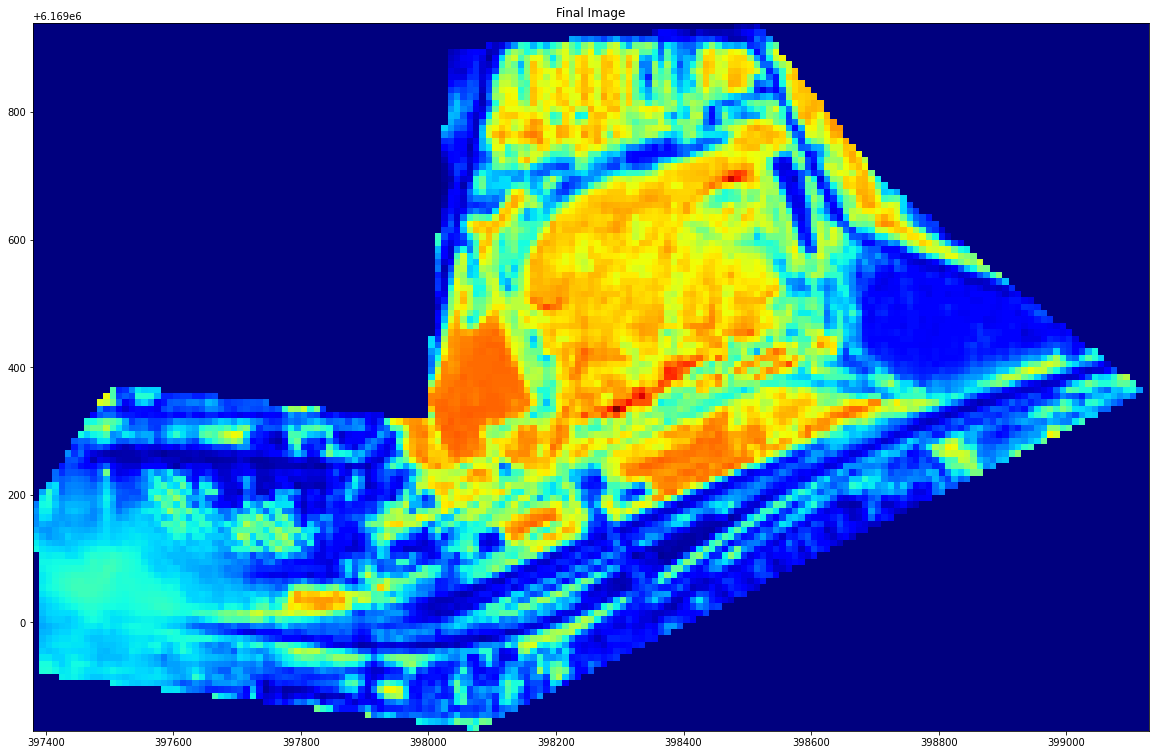

<AxesSubplot:title={'center':'Final Image'}>

In [147]:
plt.set_cmap('jet')
plt.figure(figsize=(20,20))
plt.title('Final Image')
plot.show(src, adjust='linear')

<Figure size 432x288 with 0 Axes>

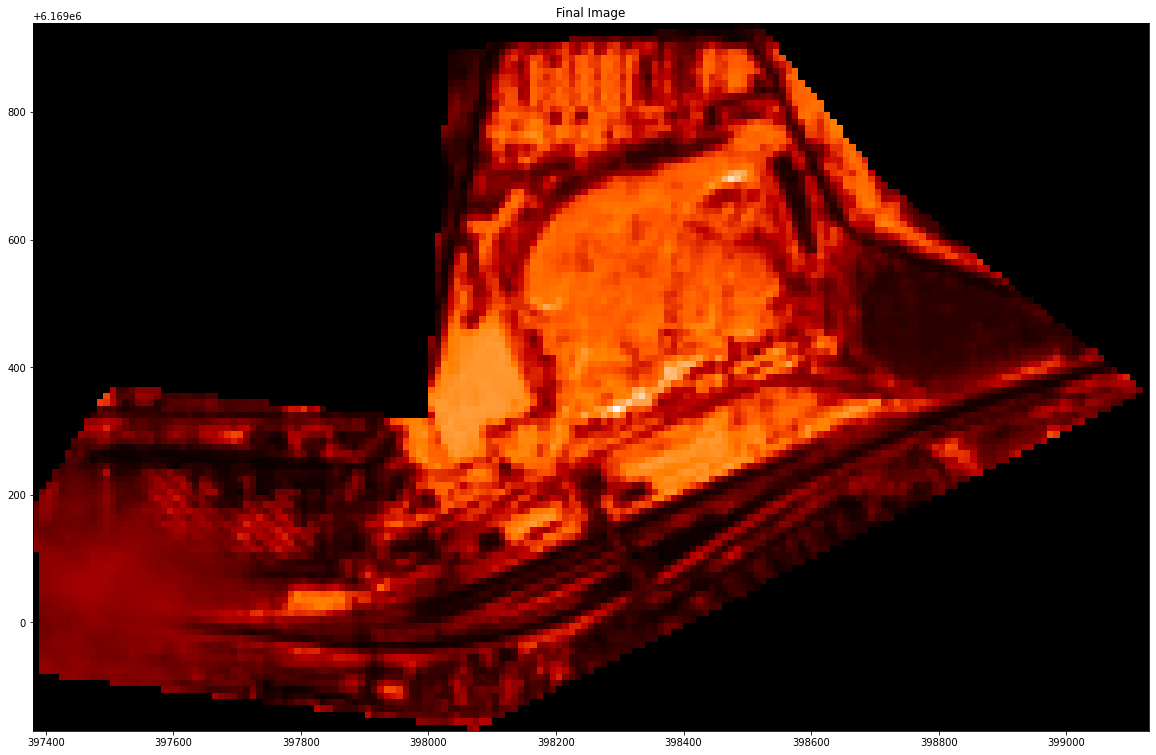

<AxesSubplot:title={'center':'Final Image'}>

In [146]:
plt.set_cmap('gist_heat')
plt.figure(figsize=(20,20))
plt.title('Final Image')
plot.show(src, adjust='linear')

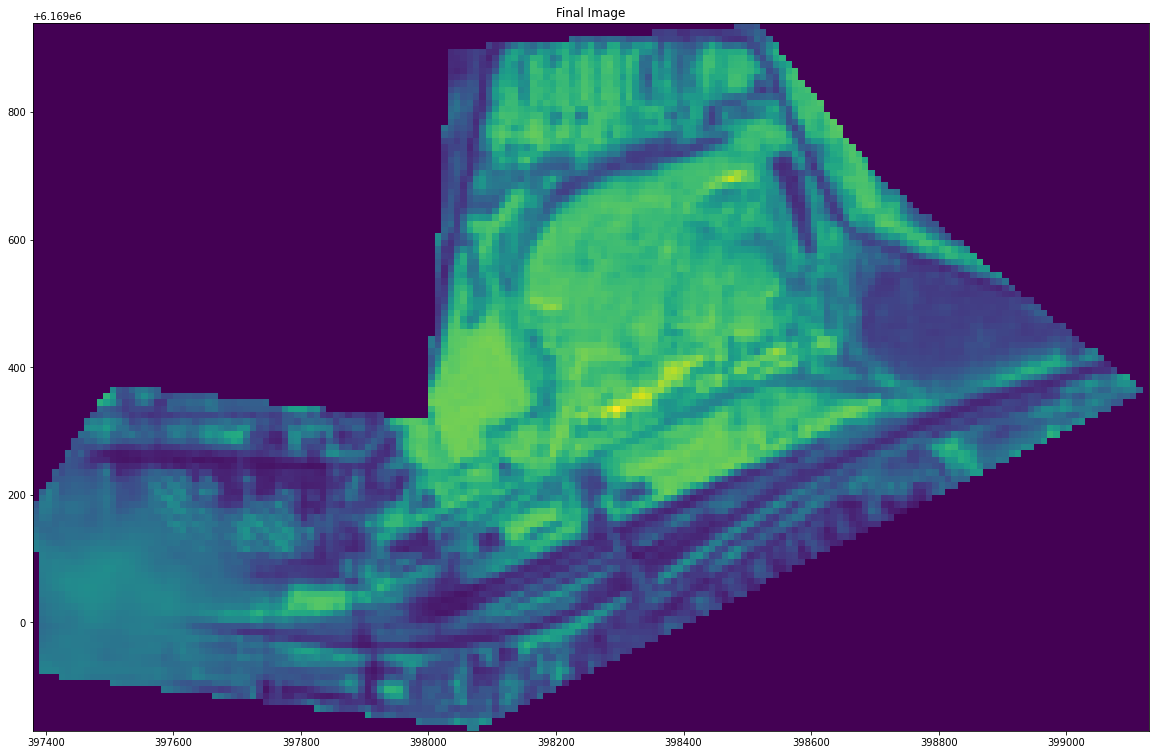

<AxesSubplot:title={'center':'Final Image'}>

In [124]:
plt.figure(figsize=(20,20))
plt.title('Final Image')
plot.show(src)

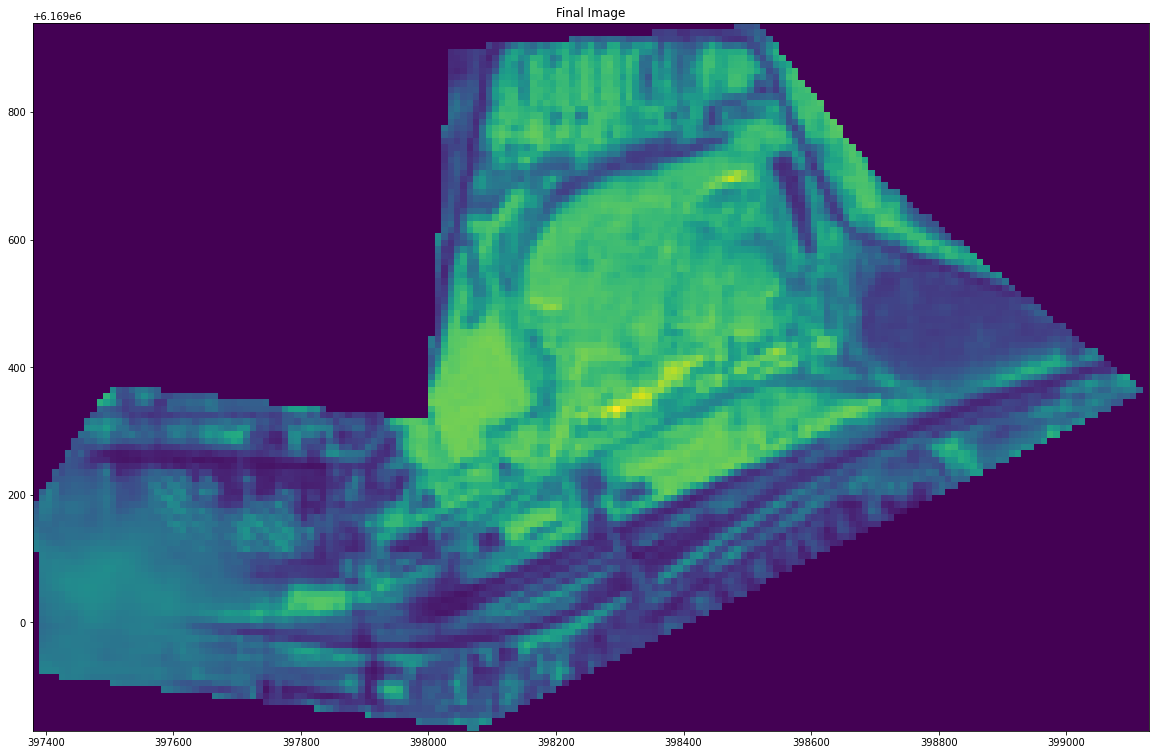

<AxesSubplot:title={'center':'Final Image'}>

In [123]:
plt.figure(figsize=(20,20))
plt.title('Final Image')
plot.show(src, adjust='linear')

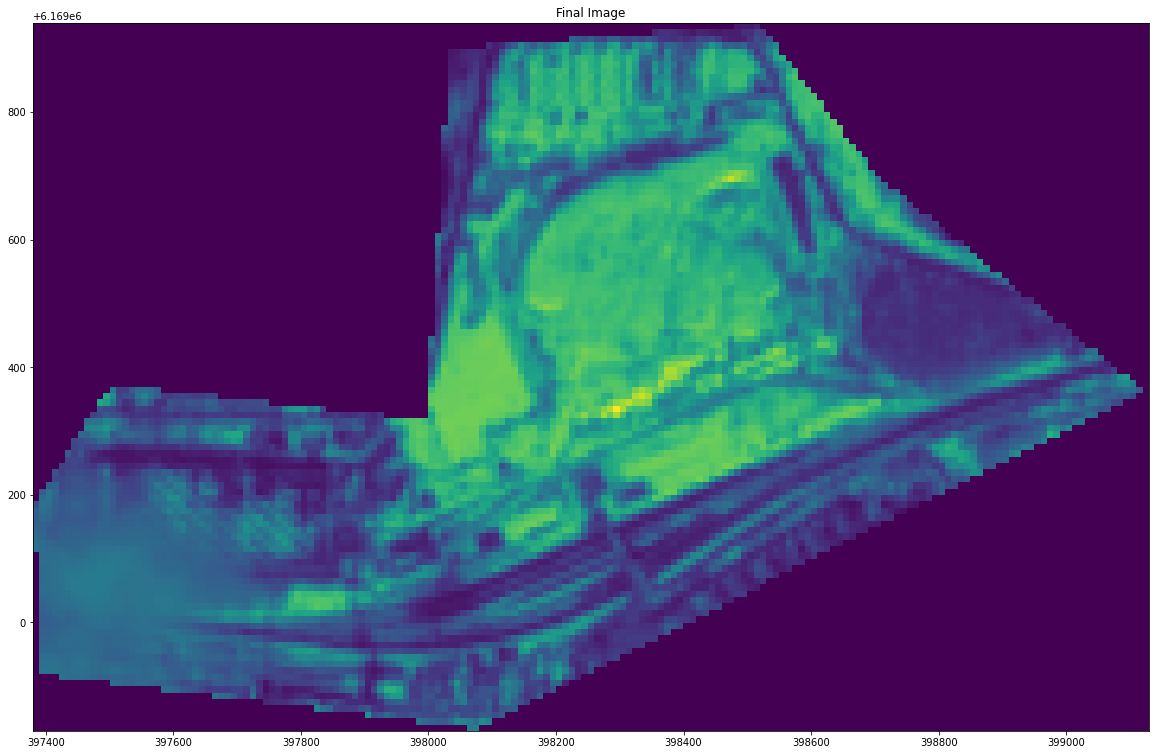

<AxesSubplot:title={'center':'Final Image'}>

In [113]:
plt.figure(figsize=(20,20))
plt.title('Final Image')
plot.show(src, adjust='linear')

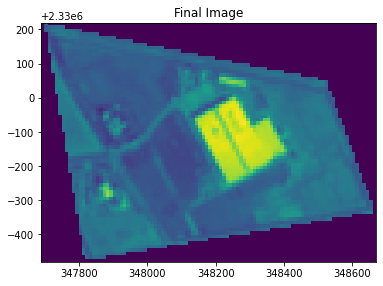

<AxesSubplot:title={'center':'Final Image'}>

In [53]:
plt.figure(figsize=(6,6))
plt.title('Final Image')
plot.show(src, adjust='linear')